# METIS LM imaging mode

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

import scopesim as sim
from scopesim.source.source_templates import star, star_field, empty_sky

sim.rc.__currsys__["!SIM.file.local_packages_path"] = r"F:/Work/irdb"

# Make a gird of 100 stars between 0 and 20 mag

In [4]:
src = star(mag=0, x=0, y=0) + star(mag=2, x=-2, y=0) + star(mag=4, x=2, y=0)

# Make the METIS optical train and show the effects included

In [6]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=["lss_l"])
metis = sim.OpticalTrain(cmd)
metis["detector_linearity"].include = False
metis.effects

element,name,class,included
str27,str32,str22,str9
armazones,armazones_atmo_skycalc_ter_curve,SkycalcTERCurve,True
armazones,armazones_atmo_dispersion,AtmosphericDispersion,False
armazones,armazones_atmo_default_ter_curve,AtmosphericTERCurve,False
ELT,eso_combined_reflection,SurfaceList,True
ELT,scope_vibration,Vibration,False
ELT,scope_surface_list,SurfaceList,False
METIS,metis_cfo_surfaces,SurfaceList,True
METIS,slit_wheel,SlitWheel,!OBS.slit
METIS,cold_stop,PupilTransmission,True


# Set the exposure time

In [16]:
metis.cmds["!OBS.dit"] = 600

# Observe the grid of stars

In [17]:
metis.observe(src)
imgIP = metis.image_planes[0].data

hdus = metis.readout()
imgDE = hdus[0][1].data

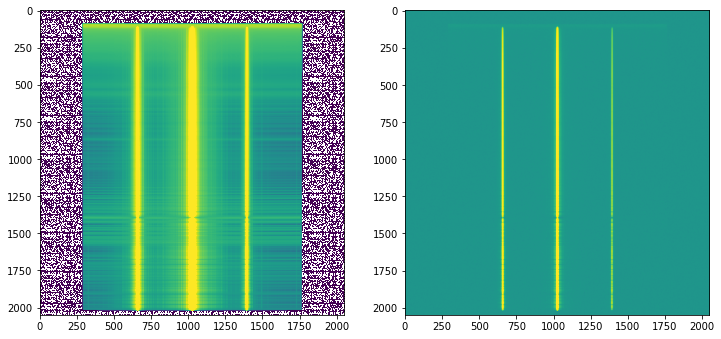

In [23]:
n = 100
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(imgIP, norm=LogNorm(), vmax=n*np.median(imgIP))
plt.subplot(122)
plt.imshow(imgDE, norm=LogNorm(), vmax=n*np.median(imgDE))